In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2-DL

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HW2-DL


##**Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from math import isnan, floor
from imblearn.over_sampling import SMOTE
from collections import Counter
import random
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

*Loading Data*

In [ ]:
train_df = pd.read_csv("./Data/HW2_data/Q3_train.csv") 
test_df = pd.read_csv("./Data/HW2_data/Q3_test.csv") 

In [ ]:
train_df  = train_df.dropna()
test_df = test_df.dropna()

*Data Frame to Numpy Array*

In [ ]:
def dataframe_to_nparray(train_df, test_df):
    train_df1 = train_df.copy(deep = True)
    test_df1 = test_df.copy(deep = True)
    train_images = train_df1.iloc[:, 1:].to_numpy(dtype = 'float32')
    test_images = test_df1.iloc[:, 1:].to_numpy(dtype = 'float32')
    return train_images,test_images

In [ ]:
train_img, test_img = dataframe_to_nparray(train_df, test_df)
train_labels = train_df['label'].values
test_labels = test_df['label'].values

##**PREPROCESSING**

*Normalization*

In [ ]:
train_img =  preprocessing.scale(train_img )
test_img =preprocessing.scale(test_img )

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably v

*Balance* *Dataset*

In [ ]:
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(train_img, train_labels)
print(f"Training target statistics: {Counter(y_res)}")


Training target statistics: Counter({3: 1294, 6: 1294, 2: 1294, 13: 1294, 16: 1294, 8: 1294, 22: 1294, 18: 1294, 10: 1294, 20: 1294, 17: 1294, 19: 1294, 21: 1294, 23: 1294, 24: 1294, 1: 1294, 12: 1294, 11: 1294, 15: 1294, 4: 1294, 0: 1294, 5: 1294, 7: 1294, 14: 1294})


*Show Some Sample*

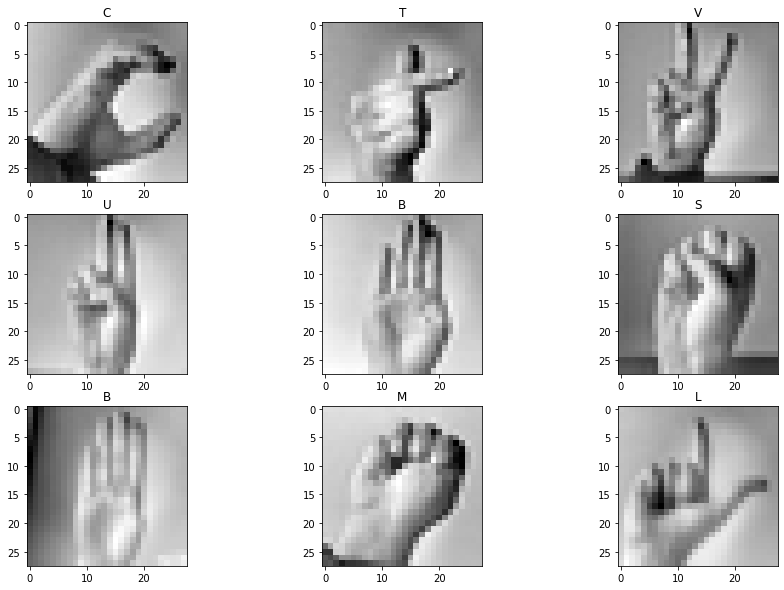

In [ ]:
nums = random.sample(range(0, X_res.shape[0]-1), 9)
fig = plt.figure(figsize=(15, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  img=X_res[nums[i],:]
  plt.imshow(img.reshape(28, 28),cmap = 'gray')
  plt.title(chr(y_res[nums[i]]+65))


##**Split Train and Validation**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

##**Training and Testing**

*With ADAM Optimizer and Without Dropout*

In [ ]:

model = Sequential([
    
    
    # dense layer 1
    Dense( X_res.shape[1], activation='relu'),  
    
    # dense layer 2
    Dense(128, activation='relu'), 
    
      # output layer
    Dense(25, activation='sigmoid'),  
])

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(X_res, y_res, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 2s 115ms/step - loss: 1.8370 - accuracy: 0.5070 - val_loss: 0.6938 - val_accuracy: 0.8339
Epoch 2/10
13/13 [==============================] - 1s 103ms/step - loss: 0.4562 - accuracy: 0.8897 - val_loss: 0.1989 - val_accuracy: 0.9654
Epoch 3/10
13/13 [==============================] - 1s 103ms/step - loss: 0.1348 - accuracy: 0.9855 - val_loss: 0.0632 - val_accuracy: 0.9990
Epoch 4/10
13/13 [==============================] - 1s 102ms/step - loss: 0.0462 - accuracy: 0.9995 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 1s 104ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 1s 103ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 1s 102ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 

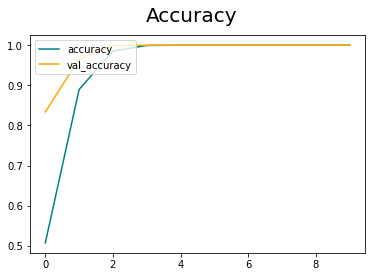

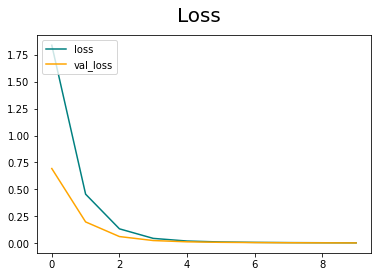

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
results = model.evaluate(test_img,  test_labels, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.7539896965026855, 0.806609034538269]


*With SGD Optimizer and Without Dropout*

In [ ]:
model4 = Sequential([
    
    
    # dense layer 1
    Dense( X_res.shape[1], activation='relu'),  
    
    # dense layer 2
    Dense(128, activation='relu'), 
    
      # output layer
    Dense(25, activation='sigmoid'),  
])

In [ ]:
model4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model4.fit(X_res, y_res, epochs=150, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/150
13/13 [==============================] - 2s 113ms/step - loss: 3.2904 - accuracy: 0.0647 - val_loss: 3.0778 - val_accuracy: 0.1169
Epoch 2/150
13/13 [==============================] - 1s 103ms/step - loss: 2.9699 - accuracy: 0.1509 - val_loss: 2.8655 - val_accuracy: 0.2011
Epoch 3/150
13/13 [==============================] - 1s 113ms/step - loss: 2.7738 - accuracy: 0.2306 - val_loss: 2.6934 - val_accuracy: 0.2667
Epoch 4/150
13/13 [==============================] - 2s 171ms/step - loss: 2.6089 - accuracy: 0.2972 - val_loss: 2.5379 - val_accuracy: 0.3379
Epoch 5/150
13/13 [==============================] - 2s 117ms/step - loss: 2.4579 - accuracy: 0.3572 - val_loss: 2.3884 - val_accuracy: 0.3949
Epoch 6/150
13/13 [==============================] - 1s 102ms/step - loss: 2.3167 - accuracy: 0.4113 - val_loss: 2.2498 - val_accuracy: 0.4422
Epoch 7/150
13/13 [==============================] - 1s 101ms/step - loss: 2.1845 - accuracy: 0.4588 - val_loss: 2.1188 - val_accuracy: 0.4942

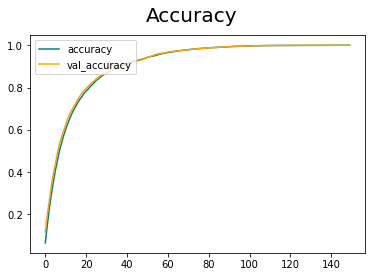

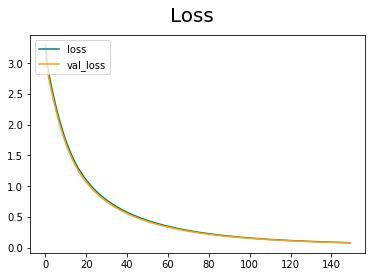

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
results = model4.evaluate(test_img,  test_labels, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.6668615937232971, 0.799358606338501]


SGD produces the same performance as regular gradient descent when the learning rate is low. Adam's optimization method computes individual adaptive learning rates for different parameters from estimates of the first and second moments of the gradients. Also SGD need more epochs to have 100 accuracy

Adam works better than SGD on test dataset

*With ADAM Optimizer and With Dropout*

In [ ]:
model2 = Sequential([
    
    
    # dense layer 1
    Dense( X_res.shape[1], activation='relu'),  
    Dropout(0.2),
    
    # dense layer 2
    Dense(128, activation='relu'), 
    Dropout(0.2),
    
      # output layer
    Dense(25, activation='sigmoid'),  
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model2.fit(X_res, y_res, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 2s 131ms/step - loss: 2.1091 - accuracy: 0.3918 - val_loss: 0.8483 - val_accuracy: 0.7944
Epoch 2/10
13/13 [==============================] - 2s 119ms/step - loss: 0.7832 - accuracy: 0.7581 - val_loss: 0.2725 - val_accuracy: 0.9504
Epoch 3/10
13/13 [==============================] - 2s 120ms/step - loss: 0.3548 - accuracy: 0.8974 - val_loss: 0.1017 - val_accuracy: 0.9886
Epoch 4/10
13/13 [==============================] - 2s 120ms/step - loss: 0.1694 - accuracy: 0.9620 - val_loss: 0.0366 - val_accuracy: 0.9998
Epoch 5/10
13/13 [==============================] - 2s 121ms/step - loss: 0.0938 - accuracy: 0.9825 - val_loss: 0.0175 - val_accuracy: 0.9998
Epoch 6/10
13/13 [==============================] - 2s 119ms/step - loss: 0.0573 - accuracy: 0.9915 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 2s 119ms/step - loss: 0.0399 - accuracy: 0.9952 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 

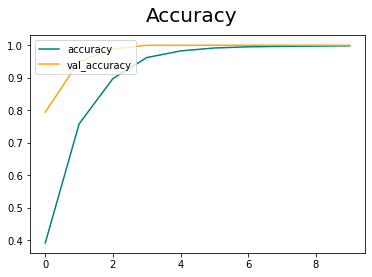

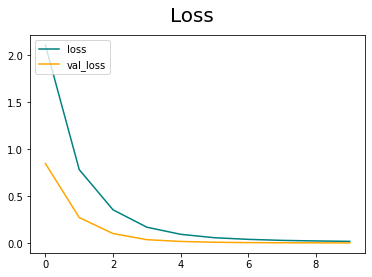

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
results = model2.evaluate(test_img,  test_labels, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.7115587592124939, 0.8287785649299622]


*With SGD Optimizer and With Dropout*

In [ ]:
model3 = Sequential([
    
    
    # dense layer 1
    Dense( X_res.shape[1], activation='relu'),  
    Dropout(0.2),
    
    # dense layer 2
    Dense(128, activation='relu'), 
    Dropout(0.2),
    
      # output layer
    Dense(25, activation='sigmoid'),  
])

In [ ]:
model3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model3.fit(X_res, y_res, epochs=150, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/150
13/13 [==============================] - 2s 128ms/step - loss: 3.5669 - accuracy: 0.0514 - val_loss: 3.1900 - val_accuracy: 0.0839
Epoch 2/150
13/13 [==============================] - 2s 120ms/step - loss: 3.1861 - accuracy: 0.0912 - val_loss: 2.9577 - val_accuracy: 0.1502
Epoch 3/150
13/13 [==============================] - 1s 116ms/step - loss: 2.9906 - accuracy: 0.1338 - val_loss: 2.7921 - val_accuracy: 0.2176
Epoch 4/150
13/13 [==============================] - 2s 118ms/step - loss: 2.8399 - accuracy: 0.1758 - val_loss: 2.6492 - val_accuracy: 0.2822
Epoch 5/150
13/13 [==============================] - 1s 115ms/step - loss: 2.7153 - accuracy: 0.2141 - val_loss: 2.5157 - val_accuracy: 0.3410
Epoch 6/150
13/13 [==============================] - 2s 119ms/step - loss: 2.5929 - accuracy: 0.2552 - val_loss: 2.3903 - val_accuracy: 0.3917
Epoch 7/150
13/13 [==============================] - 2s 117ms/step - loss: 2.4741 - accuracy: 0.2967 - val_loss: 2.2689 - val_accuracy: 0.4401

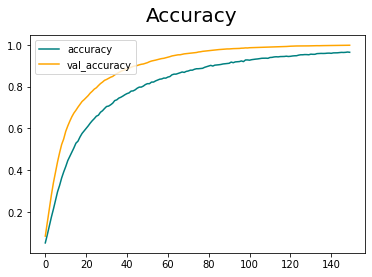

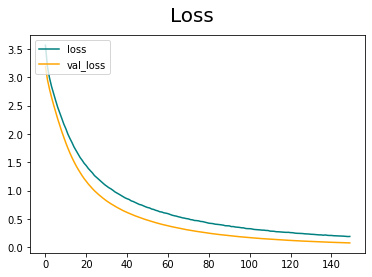

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
results = model3.evaluate(test_img,  test_labels, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.6956127285957336, 0.7900167107582092]


Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.
Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

By adding dropout we need more epochs to train model and at the end we have better accuracy for Adam optimizer. for SGD optimizer we need more epochs too but at the end we don't get better accuracy.

The best model is Adam optimizer with dropout ---> accuracy on test = 82.9%

In [ ]:
def preprocessMe(image):
  my= np.array(image).reshape((784))
  my=preprocessing.scale(my )
  return my

In [ ]:
import cv2
image=cv2.imread("./Data/HW2_data/test/A.jpg",cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(image, (28, 28))
test1=preprocessMe(resized_img)
image=cv2.imread("./Data/HW2_data/test/B.jpg",cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(image, (28, 28))
test2=preprocessMe(resized_img )
image=cv2.imread("./Data/HW2_data/test/W.jpg",cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(image, (28, 28))
test3=preprocessMe(resized_img )
test= np.array([test1, test2,test3], np.int32)
print(test.shape)
test_real=np.array([[0],[1],[23]], np.int32)
test_real=test_real.reshape(3)
print(test_real.shape)

(3, 784)
(3,)


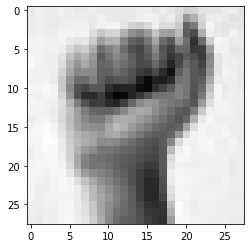

In [ ]:
plt.imshow(test1.reshape(28, 28),cmap = 'gray')

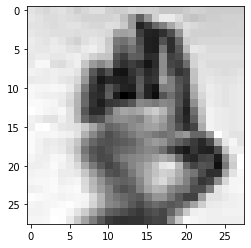

In [ ]:
plt.imshow(test2.reshape(28, 28),cmap = 'gray')

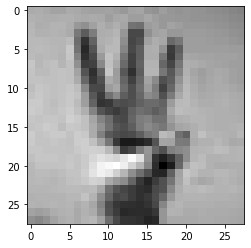

In [ ]:
plt.imshow(test3.reshape(28, 28),cmap = 'gray')

In [ ]:
x=test_img
y= test_labels
x[0,:]=test1
x[1,:]=test2
x[2,:]=test3
y[0]=0
y[1]=1
y[2]=23
e= model2.evaluate(x[0:2,:],  y[0:2], verbose = 1)

1/1 [==============================] - 0s 17ms/step - loss: 9.0569 - accuracy: 0.0000e+00
